In [1]:
! pip install pymongo
import pandas as pd
from pymongo import MongoClient

# 📌 1️⃣ Conectar a MongoDB
cliente = MongoClient("mongodb://localhost:27017/")  # Asegúrate de que MongoDB está corriendo
db = cliente["NYC_RentalCars"]  # Nombre de la base de datos
coleccion = db["RentalCarsData"]  # Nombre de la colección

# 📌 2️⃣ Cargar el CSV en un DataFrame
archivo_csv = "For_Hire_Vehicles__FHV__-_Active_20250223.csv"  # Cambia esto por la ruta real del archivo
df = pd.read_csv(archivo_csv, sep=";")

# 📌 3️⃣ Convertir el DataFrame a JSON para MongoDB
datos_json = df.to_dict(orient="records")

# 📌 4️⃣ Insertar datos en MongoDB
coleccion.insert_many(datos_json)

print("🚀 Datos cargados exitosamente en MongoDB.")


for doc in coleccion.find().limit(5):  
    print(doc)

   ---------------------------------------- 0.0/831.6 kB ? eta -:--:--
   --------------------------------------- 831.6/831.6 kB 18.4 MB/s eta 0:00:00
🚀 Datos cargados exitosamente en MongoDB.
{'_id': ObjectId('67bab7c8d63f288a20e1811f'), 'Active': 'YES', 'Vehicle License Number': '5829855', 'Name': 'DONG,,SHIHANG', 'License Type': 'FOR HIRE VEHICLE', 'Expiration Date': '11/22/2025', 'Permit License Number': nan, 'DMV License Plate Number': 'T745891C', 'Vehicle VIN Number': 'KM8JECA11NU054398', 'Wheelchair Accessible': nan, 'Certification Date': nan, 'Hack Up Date': nan, 'Vehicle Year': 2022, 'Base Number': 'B00887', 'Base Name': 'DIAL 7 CAR & LIMOUSINE SERVICE INC.', 'Base Type': 'LIVERY', 'VEH': nan, 'Base Telephone Number': '(212)777-7777', 'Website': 'DIAL7.COM', 'Base Address': '43-23   35 STREET LIC NY 11101', 'Reason': 'G', 'Order Date': nan, 'Last Date Updated': '02/22/2025', 'Last Time Updated': '13:25'}
{'_id': ObjectId('67bab7c8d63f288a20e18120'), 'Active': 'YES', 'Vehicle L

## Cuántos coches tiene cada empresa de vehículos de alquiler

c:\Users\sergi\.conda\envs\documentos\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


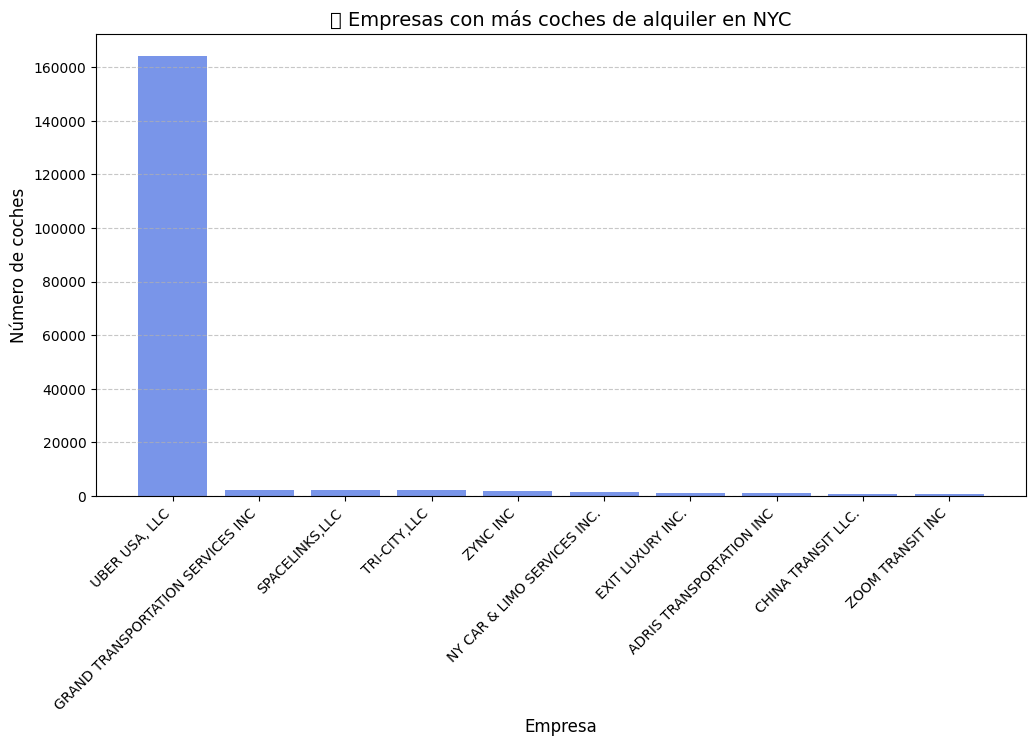

In [3]:
import matplotlib.pyplot as plt

# 📊 Contar la cantidad de coches por empresa
conteo_empresas = pd.DataFrame(list(coleccion.aggregate([
    {"$group": {"_id": "$Base Name", "cantidad": {"$sum": 1}}},  # Contamos cuántos coches por empresa
    {"$sort": {"cantidad": -1}},  # Ordenamos por cantidad (de mayor a menor)
    {"$limit": 10}  # Solo las 10 principales empresas
])))

# 📊 Graficar
plt.figure(figsize=(12,6))
plt.bar(conteo_empresas["_id"], conteo_empresas["cantidad"], color="royalblue", alpha=0.7)
plt.title("🔝 Empresas con más coches de alquiler en NYC", fontsize=14)
plt.xlabel("Empresa", fontsize=12)
plt.ylabel("Número de coches", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## Distribución de los vehículos por año de fabricación

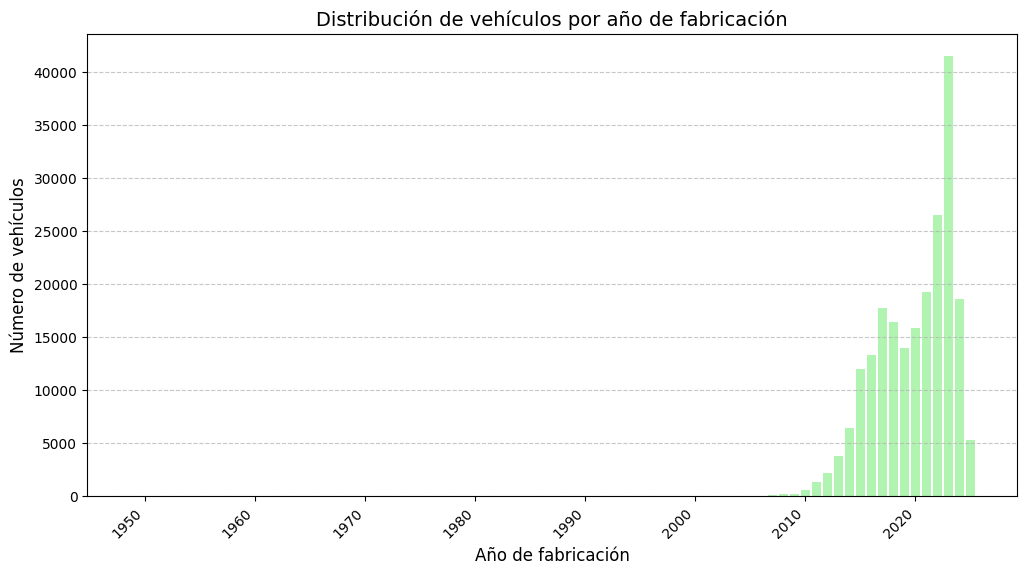

In [4]:
# 📊 Distribución de los vehículos por año de fabricación
anio_vehiculos = pd.DataFrame(list(coleccion.aggregate([
    {"$group": {"_id": "$Vehicle Year", "cantidad": {"$sum": 1}}},  # Contamos los vehículos por año
    {"$sort": {"_id": 1}}  # Ordenamos por año (de menor a mayor)
])))

# 📊 Graficar
plt.figure(figsize=(12,6))
plt.bar(anio_vehiculos["_id"], anio_vehiculos["cantidad"], color="lightgreen", alpha=0.7)
plt.title("Distribución de vehículos por año de fabricación", fontsize=14)
plt.xlabel("Año de fabricación", fontsize=12)
plt.ylabel("Número de vehículos", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## Queremos conocer la distribución de los vehículos según el tipo de base 

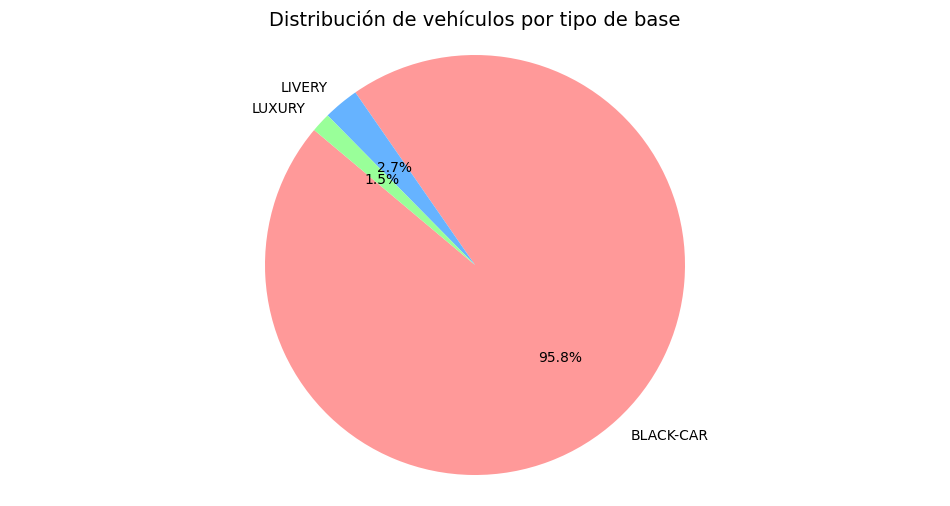

In [5]:
# 📊 Contar los vehículos por tipo de base
tipos_base = pd.DataFrame(list(coleccion.aggregate([
    {"$group": {"_id": "$Base Type", "cantidad": {"$sum": 1}}},  # Contamos los vehículos por tipo de base
    {"$sort": {"cantidad": -1}}  # Ordenamos por cantidad (de mayor a menor)
])))

# 📊 Graficar
plt.figure(figsize=(12,6))
plt.pie(tipos_base["cantidad"], labels=tipos_base["_id"], autopct="%1.1f%%", startangle=140, colors=["#ff9999","#66b3ff","#99ff99", "#ffcc99", "#c2c2f0"])
plt.title("Distribución de vehículos por tipo de base", fontsize=14)
plt.axis("equal")  # Para hacer el gráfico circular
plt.show()


## Vehículos accesibles para sillas de ruedas

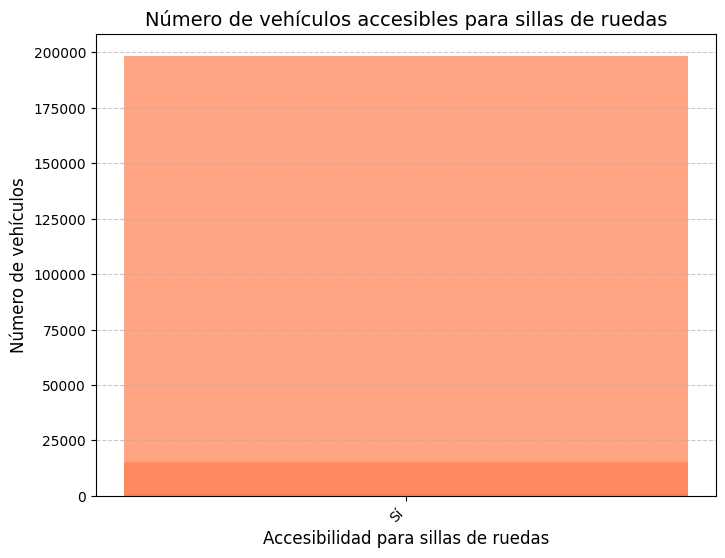

In [7]:
# 📊 Filtrar los vehículos que tienen datos válidos en "Wheelchair Accessible"
accesibles_vehiculos = pd.DataFrame(list(coleccion.aggregate([
    {"$match": {"Wheelchair Accessible": {"$ne": "nan"}, "Wheelchair Accessible": {"$ne": None}}},  # Filtrar valores nulos o 'nan'
    {"$group": {"_id": "$Wheelchair Accessible", "cantidad": {"$sum": 1}}},  # Contamos los vehículos accesibles
])))

# Convertir valores a categorías comprensibles, por ejemplo "Sí" y "No"
accesibles_vehiculos["_id"] = accesibles_vehiculos["_id"].apply(lambda x: "Sí" if x else "No")

# 📊 Graficar
plt.figure(figsize=(8,6))
plt.bar(accesibles_vehiculos["_id"], accesibles_vehiculos["cantidad"], color="coral", alpha=0.7)
plt.title("Número de vehículos accesibles para sillas de ruedas", fontsize=14)
plt.xlabel("Accesibilidad para sillas de ruedas", fontsize=12)
plt.ylabel("Número de vehículos", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## Vehículos con fecha de expiración cercana

Vehículos con expiración cercana: 104856


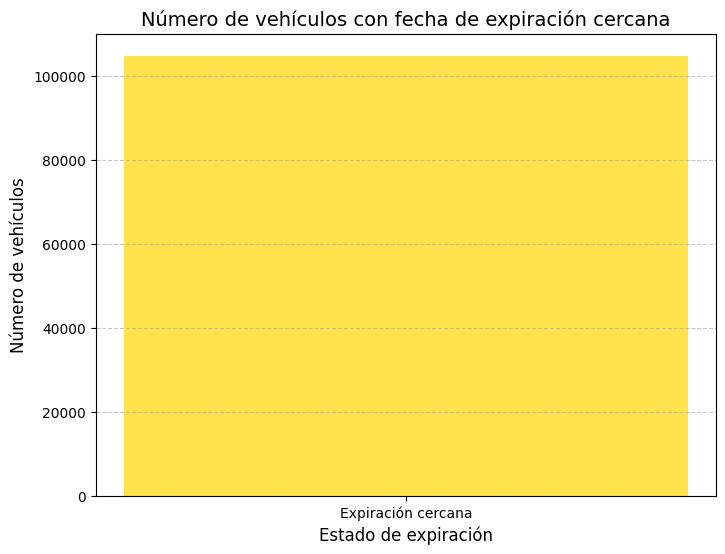

In [15]:
from datetime import datetime


# Obtener los documentos de MongoDB
vehiculos = list(coleccion.find())  # Si necesitas filtros, usa .aggregate()

# Convertir el DataFrame a pandas
df = pd.DataFrame(vehiculos)

# Asegurarse de que las columnas están correctamente formateadas (si el campo 'Expiration Date' existe en tu colección)
if 'Expiration Date' in df.columns:
    # Convertir las fechas a formato datetime
    df['Expiration Date'] = pd.to_datetime(df['Expiration Date'], errors='coerce')

    # Filtrar solo aquellos vehículos con una fecha de expiración válida
    df = df.dropna(subset=['Expiration Date'])

    # Calcular la diferencia de días entre la fecha de expiración y la fecha actual
    current_date = datetime.now()
    df['Days to Expiration'] = (df['Expiration Date'] - current_date).dt.days

    # Filtrar los vehículos cuya expiración esté dentro de un año (365 días)
    vehiculos_expiracion = df[df['Days to Expiration'] <= 365]

    # Mostrar el número de vehículos con expiración cercana
    print("Vehículos con expiración cercana:", len(vehiculos_expiracion))

    # 📊 Graficar
    plt.figure(figsize=(8,6))
    plt.bar(["Expiración cercana"], [len(vehiculos_expiracion)], color="gold", alpha=0.7)
    plt.title("Número de vehículos con fecha de expiración cercana", fontsize=14)
    plt.xlabel("Estado de expiración", fontsize=12)
    plt.ylabel("Número de vehículos", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
else:
    print("No se encuentra la columna 'Expiration Date' en los datos.")



## Antigüedad de la flota

Se encontraron 214688 documentos.
Columnas del DataFrame: Index(['_id', 'Active', 'Vehicle License Number', 'Name', 'License Type',
       'Expiration Date', 'Permit License Number', 'DMV License Plate Number',
       'Vehicle VIN Number', 'Wheelchair Accessible', 'Certification Date',
       'Hack Up Date', 'Vehicle Year', 'Base Number', 'Base Name', 'Base Type',
       'VEH', 'Base Telephone Number', 'Website', 'Base Address', 'Reason',
       'Order Date', 'Last Date Updated', 'Last Time Updated'],
      dtype='object')
   Vehicle Year  Antigüedad
0          2022           3
1          2018           7
2          2018           7
3          2022           3
4          2023           2


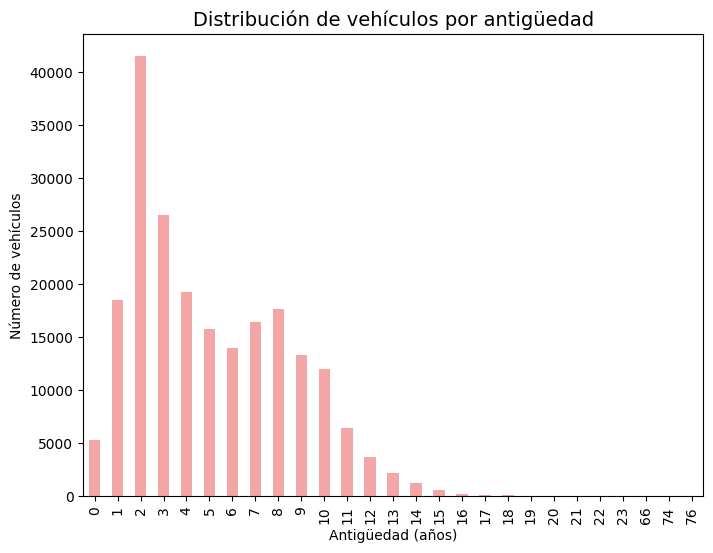

In [ ]:

from datetime import datetime



# Cargar datos desde MongoDB
documentos = list(coleccion.find())  # Obtener los documentos de MongoDB

# Verificar si los documentos fueron obtenidos correctamente
if documentos:
    print(f"Se encontraron {len(documentos)} documentos.")
else:
    print("No se encontraron documentos.")

# Convertir los documentos a un DataFrame
df_vehiculos = pd.DataFrame(documentos)

# Verificar las columnas del DataFrame
print("Columnas del DataFrame:", df_vehiculos.columns)

# Filtrar solo las columnas necesarias
df_vehiculos = df_vehiculos[['Vehicle Year']]

# Asegurarnos de que los valores de 'Vehicle Year' son numéricos
df_vehiculos['Vehicle Year'] = pd.to_numeric(df_vehiculos['Vehicle Year'], errors='coerce')

# Calcular la antigüedad
fecha_actual = datetime.now().year
df_vehiculos['Antigüedad'] = fecha_actual - df_vehiculos['Vehicle Year']

# Verificar los primeros registros
print(df_vehiculos.head())

# 📊 Graficar
plt.figure(figsize=(8,6))
df_vehiculos['Antigüedad'].value_counts().sort_index().plot(kind='bar', color="lightcoral", alpha=0.7)
plt.title("Distribución de vehículos por antigüedad", fontsize=14)
plt.xlabel("Antigüedad (años)")
plt.ylabel("Número de vehículos")
plt.show()


